In [1]:
import numpy as np
import scipy.stats

import sys
sys.path.append("../../../")
from chiseling.dgps.basic_binary_regression import BasicBinaryRegression

from chiseling.source.learners.baselearners_binary import logreg_learner
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [2]:
n_sims = 300
random_seed = 42

In [3]:
sampler = BasicBinaryRegression(d=100, s=5, rho=0.2, theta=2, tau=2.2, random_seed=42)

In [4]:
all_n_sub_preds = []
for _ in range(n_sims):
    X, Y = sampler.sample(1000)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.9)
    predictor, _ = logreg_learner(X_train, Y_train)
    n_sub_preds = (predictor(X_test).flatten() > 0.9).sum()
    all_n_sub_preds.append(n_sub_preds)
all_n_sub_preds = np.array(all_n_sub_preds)

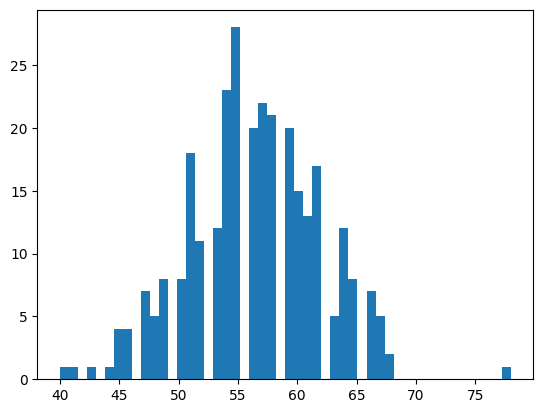

In [5]:
plt.hist(all_n_sub_preds, bins=50)
plt.show()

In [6]:
n_sims = 100

In [7]:
sampler = BasicBinaryRegression(d=100, s=5, rho=0.2, theta=1.5, tau=-1.936)

In [8]:
all_n_sub_preds = []
for _ in range(n_sims):
    X, Y = sampler.sample(25000)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8)
    predictor, _ = logreg_learner(X_train, Y_train)
    n_sub_preds = (predictor(X_test).flatten() > 0.9).sum()
    all_n_sub_preds.append(n_sub_preds)
all_n_sub_preds = np.array(all_n_sub_preds)

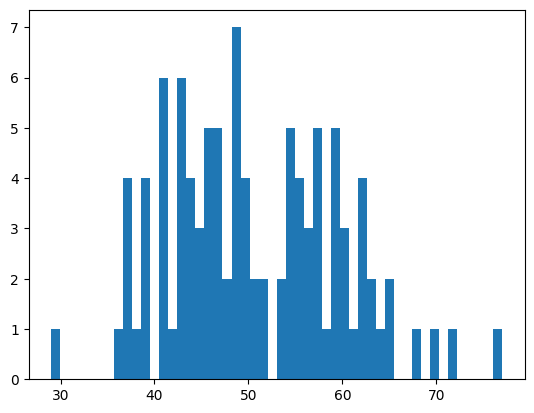

In [9]:
plt.hist(all_n_sub_preds, bins=50)
plt.show()